# Introduction

Here I'm testing a DQN on the lunar landing environment. I'm using 

1. Experience replay
2. A target network.

I update the target network every $C$ timesteps.


### Train

/home/kokeeffe/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


WARN: gym.spaces.Box autodetected dtype as <type 'numpy.float32'>. Please provide explicit dtype.
(episode, score) = (50, -242.67822055990112)
(episode, score) = (100, -197.03106344095409)
(episode, score) = (150, -266.1442354980703)
(episode, score) = (200, -533.4392532483123)
(episode, score) = (250, -534.8463646547602)
(episode, score) = (300, -500.1299029999613)
(episode, score) = (350, -495.01503638484775)
(episode, score) = (400, -268.74600032300924)
(episode, score) = (450, -1041.100023231831)
(episode, score) = (500, -307.14013131231934)
(episode, score) = (550, -493.6566962701118)
(episode, score) = (600, -520.2200113926503)
(episode, score) = (650, -300.4379598655844)
(episode, score) = (700, -463.67839047753233)
(episode, score) = (750, -95.71398241532023)
(episode, score) = (800, -456.6490508767037)
(episode, score) = (850, -464.6609624276836)
(episode, score) = (900, -34.247311246161814)
(episode, score) = (950, -560.5447055280515)
(episode, score) = (1000, -595.2448109270

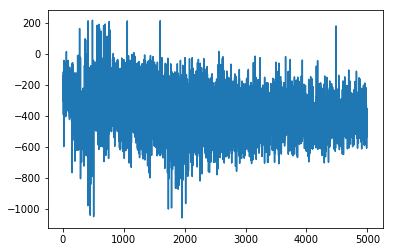

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import gym
#from agent_vanilla import Agent
from agent import Agent
from keras.utils import to_categorical
%matplotlib inline


#Environment
env = gym.make('LunarLander-v2')
env.seed(1)  # for comparison
num_states = env.observation_space.shape[0]
num_actions = env.action_space.n


#Agent
#lr,gamma = 2.5*10**-4, 0.995
#agent = Agent(num_states, num_actions, lr, gamma)
#agent.epsilon = 0.95
#epsilon_min = 0.01
#decay_factor = 0.99
#agent.tau = 0.02
#agent.memory_size = 20000
#learning_start = 1000

#Agent
lr,gamma = 0.001, 0.99
agent = Agent(num_states, num_actions, lr, gamma)
agent.epsilon = 0.8
agent.memory_size = 10**4
epsilon_min = 0.01
decay_factor = 0.99
agent.tau = 0.1
learning_start = 1000


#Train
EPISODES = 5000
scores = []
step = 0
for e in range(1,EPISODES+1):
    state = env.reset()
    reward_sum = 0
    done = False
    while not done:
        
        # env.render()
        state = np.reshape(state, [1, num_states])  #reshape for keras
        action = agent.act(state)
        next_state, reward, done, _ = env.step(action)
        reward_sum += reward
        agent.remember(state[0], action, reward, next_state, done)
        state = next_state
        
        if len(agent.memory) > learning_start:
            agent.replay()                      #update the behavior model
            agent.soft_update_target_network()  #update the target network

        #iterate
        step += 1
        if done:
            break
    
    #Learn & print results
    scores.append(reward_sum)
    agent.epsilon = max(agent.epsilon*decay_factor,epsilon_min)
    if e % 50 == 0:
        print '(episode, score) = ' + str((e,reward_sum))

plt.plot(scores)
np.savetxt('stats/scores_lunar_landing.txt',scores)

### Compare to  policy gradients

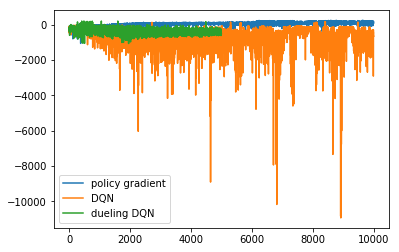

In [3]:
filename = '/home/kokeeffe/research/robocab/RL_practice/policy_gradients/stats/scores_lunar_landing.txt'
scores_PG = np.loadtxt(filename)

filename = '/home/kokeeffe/research/robocab/RL_practice/DQN/stats/scores_lunar_landing.txt'
scores_DQN = np.loadtxt(filename)

plt.plot(scores_PG)
plt.plot(scores_DQN)
plt.plot(scores)
plt.legend(['policy gradient','DQN', 'dueling DQN'])

Huh... the nets are pretty bad. The dueling at least makes things more stable, as its supposed to, but its still not learning. Hyperparameters?

### Watch a smart agent

In [12]:
state = env.reset()
state = np.reshape(state, [1, num_states])
reward_sum = 0
done = False
while not done:
    env.render()
    action = agent.act(state)
    next_state, reward, done, _ = env.step(action)
    reward_sum += reward
    next_state = np.reshape(next_state, [1, num_states])
    state = next_state
env.close()